<center> <img src="https://d3i71xaburhd42.cloudfront.net/261c3e30bae8b8bdc83541ffa9331b52fcf015e6/3-Figure2-1.png" width=50% > </center>

<br><br>

<center> 
    <font size="6">Lab 1: Colour, Intrinsic Image Decomposition & Photometric Stereo</font> 
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59, September 13, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's: Xiaoyan, Floris, Adrian</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  \
Student1 Name: 

Student2 ID: \
Student2 Name: 

Student3 ID: \
Student3 Name: 

( Student4 ID: \
Student4 Name: )

</center>

### **Import Libraries**

In [1]:
import sys

if sys.version_info[0] < 3:
    raise Exception("Python 3 or a more recent version is required.")

In [2]:
# environment and libraries
import os
import glob
import numpy as np
import random
import cv2
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "4.10.0", "You're not using the provided Python environment!"
assert np.__version__ == "1.26.4", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.9.2", "You're not using the provided Python environment!"
# Proceed to the next cell if you don't get any error.

### **Instructions**

Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 1 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to **use the Python environment provided** with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the Python cell above you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```conda env create --file=cv1_environment.yaml```, then activate the environment using the command ```conda activate cv1```.
- Do not use additional packages or materials that have not been provided or explicitly mentioned.
- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.

Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**

### **Overview**

- [Section 1: Colour Spaces (13 points)](#section-1)
  - [Question 1 (2 points)](#question-1)
  - [Question 2 (6 points)](#question-2)
  - [Question 3 (2 points)](#question-3)
  - [Question 4 (2 points)](#question-4)
  - [Question 5 (1 point)](#question-5)
- [Section 2: Colour Constancy (13 points)](#section-2)
  - [Question 6 (8 points)](#question-6)
  - [Question 7 (2 points)](#question-7)
  - [Question 8 (3 points)](#question-8)
- [Section 3: Intrinsic Image Decomposition (14 points)](#section-3)
  - [Question 9 (2 points)](#question-9)
  - [Question 10 (2 points)](#question-10)
  - [Question 11 (4 points)](#question-11)
  - [Question 12 (2 points)](#question-12)
  - [Question 13 (2 points)](#question-13)
  - [Question 14 (2 points)](#question-14)
- [Section 4: Photometric Stereo (60 points)](#section-4)
  - [Question 15 (4 points)](#question-15)
  - [Question 16 (2 points)](#question-16)
  - [Question 17 (1 point)](#question-17)
  - [Question 18 (2 points)](#question-18)
  - [Question 19 (2 points)](#question-19)
  - [Question 20 (5 points)](#question-20)
  - [Question 21 (3 points)](#question-21)
  - [Question 22 (6 points)](#question-22)
  - [Question 23 (2 points)](#question-23)
  - [Question 24 (3 points)](#question-24)
  - [Question 25 (3 points)](#question-25)
  - [Question 26 (2 points)](#question-26)
  - [Question 27 (4 points)](#question-27)
  - [Question 28 (5 points)](#question-28)
  - [Question 29 (2 points)](#question-29)
  - [Question 30 (2 points)](#question-30)
  - [Question 31 (4 points)](#question-31)
  - [Question 32 (1 point)](#question-32)
  - [Question 33 (2 points)](#question-33)
  - [Question 34 (2 points)](#question-34)
  - [Question 35 (1 point)](#question-35)
  - [Question 36 (4 points)](#question-36)
  - [Question 37 (1 point)](#question-37)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

<a id="section-1"></a>
### **Section 1: Colour Spaces**

In this part of the assignment, you will study the different colour spaces for image representations and experiment how to convert a given RGB image to a specific colour space

<a id="question-1"></a>
#### <font color='#FF0000'>Question 1 (2 points)</font>

Why do we use the RGB color model as the basis for our digital cameras and photography? How does a standard digital camera capture a full RGB color image?

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-2"></a>
#### <font color='#FF0000'>Question 2 (6 points)</font>

Create a function to convert an RGB image into various color spaces using the provided `convert_colour_space()` function and other sub-functions.

**Color Spaces to Convert:**

1. **Grayscale**

   Convert the RGB image into grayscale using 3 different methods mentioned in [John D. Cook's blog](https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/). Additionally, check and report which method OpenCV uses for grayscale conversion, include it as well, and visualize all 4 methods in the same figure.

2. **Opponent Color Space**

   $\begin{pmatrix}
   O_1 \\
   O_2 \\
   O_3
   \end{pmatrix}$ = $\begin{pmatrix}
   \frac{R-G}{\sqrt{2}} \\
   \frac{R+G-2B}{\sqrt{6}} \\
   \frac{R+G+B}{\sqrt{3}}
   \end{pmatrix}$

3. **Normalized RGB (rgb) Color Space**

   $\begin{pmatrix}
   r \\
   g \\
   b
   \end{pmatrix}$ = $\begin{pmatrix}
   \frac{R}{R+G+B} \\
   \frac{G}{R+G+B} \\
   \frac{B}{R+G+B}
   \end{pmatrix}$

4. **HSV Color Space**

   Convert the RGB image into HSV Color Space using OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2HSV)*.

5. **YCbCr Color Space**

   Convert the RGB image into YCbCr Color Space using OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2YCrCb)*. Arrange the channels in $Y, C_b,$ and $C_r$ order.

**Note:** 

- Ensure you understand the data types and ranges required by the Python conversion and image displaying functions. This usually means [0, 1] for float datatype or [0, 255] for integer datatype. Explicitly change the datatype if necessary.

- Each color space may have its own visualization requirements. For instance, think about how to meaningfully visualize the H, S, and V channels. Ensure each channel is visualized in an RGB manner where applicable.

**Extra:** It might be interesting to visualize the image in its original color space (RGB) as well.

In [4]:
def convert_rgb_to_grays(input_image):
    '''
    Converts an RGB image into grayscale using different methods and 
    returns the grayscale images stacked as separate channels.

    Args:
        input_image: RGB image

    Returns:
        new_image: image with channels representing different grayscale conversion methods
    '''

    # convert input image to array format if not already
    # YOUR CODE HERE

    # lightness method
    # YOUR CODE HERE

    # average method
    # YOUR CODE HERE

    # luminosity method
    # YOUR CODE HERE

    # built-in OpenCV function
    # YOUR CODE HERE

    # stack the results to easily visualize the 4 different methods
    new_image = np.stack([lightness, average, luminosity, opencv], axis=-1)

    return new_image

In [5]:
def convert_rgb_to_opponent(input_image):
    '''
    Converts an RGB image into the opponent color space and 
    returns the image with opponent color channels.

    Args:
        input_image: RGB image

    Returns:
        new_image: image with channels representing opponent color space
    '''

    # YOUR CODE HERE

    return new_image

In [6]:
def convert_rgb_to_normedrgb(input_image):
    '''
    Converts an RGB image into the normalized RGB (nrgb) color space and 
    returns the image with normalized RGB channels.

    Args:
        input_image: RGB image

    Returns:
        new_image: image with channels representing normalized RGB color space
    '''

    # YOUR CODE HERE

    return new_image

In [7]:
def convert_colour_space(input_image, colourspace):
    '''
    Converts an RGB image into a specified color space and 
    returns the image in its new color space.

    Args:
        input_image: RGB image
        colourspace: colour space to be converted to. 
        - choices: opponent, nrgb, hsv, ycbcr, grays

    Returns:
        new_image: image with channels in provided colour space
    '''

    # Convert the image into double precision for conversions
    input_image = input_image.astype(np.float32)

    if colourspace.lower() == 'opponent':
        # fill in the rgb2opponent function

        new_image = convert_rgb_to_opponent(input_image)

    elif colourspace.lower() == 'nrgb':
        # fill in the rgb2normedrgb function

        new_image = convert_rgb_to_normedrgb(input_image)

    elif colourspace.lower() == 'hsv':
        # use built-in function from opencv

        # YOUR CODE HERE

    elif colourspace.lower() == 'ycbcr':
        # use built-in function from opencv
        
        # YOUR CODE HERE

    elif colourspace.lower() == 'grays':
        # fill in the rgb2grays function

        new_image = convert_rgb_to_grays(input_image)

    else:
        raise NotImplementedError('Unknown colorspace type [%s]...' % colourspace)

    return new_image

<a id="question-3"></a>
#### <font color='#FF0000'>Question 3 (2 points)</font>

Visualize the image in each new color space and its individual channels separately within the same figure. For example, for the HSV color space, visualize the converted HSV image and its Hue, Saturation, and Value channels separately (4 images in 1 figure). Ensure that the channel visualizations are **meaningful**.

The function `visualize_colourspace` below needs to be completed.

In [8]:
def visualize_colourspace(image, colourspace='rgb'):
    """
    Visualize the image in its corresponding colour space.
    This function visualizes 1 figure with 4 images.
    Hint: some RGB representation of the new colour space image + each of its channels

    Args:
        image: image with channels of some colour space
        colourspace: colour space to be converted to. 
        - choices: opponent, nrgb, hsv, ycbcr, grays
    """

    # YOUR CODE HERE

    if colourspace == 'opponent':
        # YOUR CODE HERE

    elif colourspace in ['rgb', 'nrgb']:
        # YOUR CODE HERE

    elif colourspace == 'hsv':
        # YOUR CODE HERE

    elif colourspace == 'ycbcr':
        # YOUR CODE HERE

    elif colourspace == 'grays':
        # YOUR CODE HERE

    else:
        raise NotImplementedError('Unknown colorspace type [%s]...' % colourspace)
    
    plt.show()

In [9]:
# Load and convert the image to RGB
image = cv2.imread('images/beehive_house.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# YOUR CODE HERE

<a id="question-4"></a>
#### <font color='#FF0000'>Question 4 (2 points)</font>

Explain each of the above 5 colour spaces and their properties. What are the benefits of using a different colour space other than RGB? Provide reasons for each of the above cases. You can include your observations from the visualizations.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-5"></a>
#### <font color='#FF0000'>Question 5 (1 point)</font>

Find one more colour space from the literature, briefly explain its properties and give a use case.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="section-2"></a>
### **Section 2: Colour Constancy**

Colour constancy is the ability to perceive the colors of objects consistently, regardless of the color of the light source. The goal of color constancy algorithms is to estimate the light source's illuminant and then correct the image so that it appears as if taken under a canonical (white) light source. In digital cameras, the automatic white balance (AWB) function performs this task to ensure images look natural.

In this part of the assignment, you will implement the well-known Grey-World Algorithm, a fundamental color constancy algorithm. This algorithm operates under the assumption that, under white light, the average color in a scene should be grey ([128, 128, 128]).

For more information, refer to the [Grey World algorithm on Wikipedia.](https://en.wikipedia.org/wiki/Color_normalization#Grey_world)

<a id="question-6"></a>
#### <font color='#FF0000'>Question 6 (8 points)</font>

Complete the function `apply_grey_world_algorithm` to apply color correction to an RGB image using the Grey-World algorithm.

Display the original image and the color-corrected one on the same figure. Use the `beehive_house.jpg` image to test your algorithm. You should see that the reddish color cast on the image is removed, making it look more natural.

***Note:*** You do not need to apply any pre or post-processing steps. For the calculation or processing, you are not allowed to use any available code or any dedicated library function except *standard Numpy functions*.

In [5]:
def apply_grey_world_algorithm(awb_img):
    """
    Apply the Grey-World algorithm to correct the color balance of an RGB image.

    This function assumes that under a white light source, the average color in a scene should be grey.
    It corrects the image by scaling each channel so that the mean of each channel is equal.

    Args:
        awb_img: RGB image to be color corrected

    Returns:
        gw_img: Color corrected image using the Grey-World algorithm
    """

    # Convert image to a numpy array
    img_array = np.asarray(awb_img, dtype=np.float32)
    
    # Calculate the average of each channel
    R_average = np.mean(img_array[:, :, 0])
    G_average = np.mean(img_array[:, :, 1])
    B_average = np.mean(img_array[:, :, 2])
    
    # Calculate the scaling factors for each channel
    scale_R = 128 / R_average
    scale_G = 128 / G_average
    scale_B = 128 / B_average
    
    # Apply the scaling factors
    img_array[:, :, 0] *= scale_R
    img_array[:, :, 1] *= scale_G
    img_array[:, :, 2] *= scale_B
    
    # Clipping ensures the pixel values remain within range [0, 255]
    img_array = np.clip(img_array, 0, 255)
    
    # Convert the array back to an image
    gw_img = np.uint8(img_array)

    return gw_img

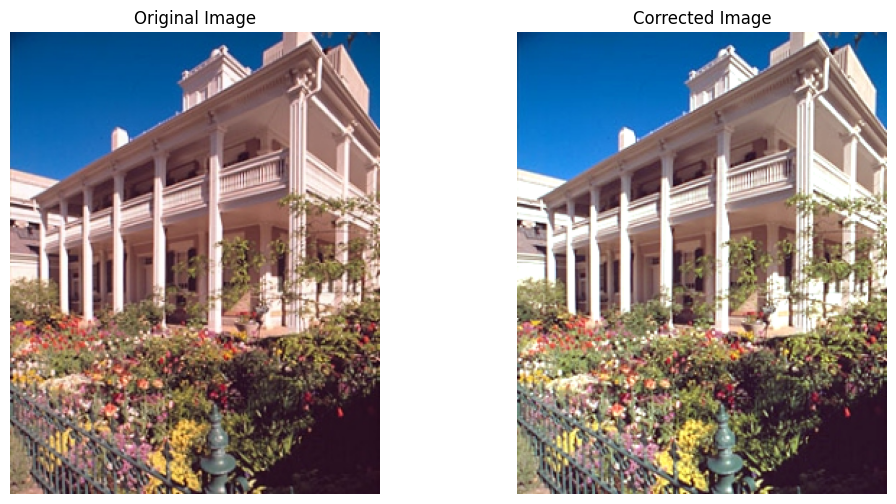

In [6]:
# load and convert the image to rgb
image = cv2.imread('images/beehive_house.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

corrected_image = apply_grey_world_algorithm(image)

# Display the original and corrected images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

# Corrected image
plt.subplot(1, 2, 2)
plt.title("Corrected Image")
plt.imshow(corrected_image)
plt.axis('off')

plt.show()


<a id="question-7"></a>
#### <font color='#FF0000'>Question 7 (2 points)</font>

Give an example case for Grey-World Algorithm on where it might fail. Include your reasoning.

##### <font color='yellow'>Answer:</font>

The Grey-World Algorithm might fail in situations where a single color dominates scene, such as in a green forest, during sunsets or underwater. The assumption that the average color in the image is grey does not hold in these cases. To still achieve this assumption, the algorithm will try to reduce the dominant color and artificially boost the other channels. This correction would result in an unnatural color shift.

<a id="question-8"></a>
#### <font color='#FF0000'>Question 8 (3 points)</font>

Find out one more colour constancy algorithm from the literature and explain it briefly.

##### <font color='yellow'>Answer:</font>


(REVISE THIS ONE)
Literature: Forsyth, D. A. (1990). A novel algorithm for color constancy. International Journal of Computer Vision, 5(1), 5-36.

Color constancy algorithms in e.g. computer vision are used to ensure that colors in images appear as they would under natural lighting conditions, even while illuminated by coloured light sources. They work by estimating the color of the light source, calculating scaling factors, and applying these corrections to produce a color-consistent image.


<a id="section-3"></a>
### **Section 3: Intrinsic Image Decomposition**

Intrinsic image decomposition is the process of separating an image into its formation components, such as reflectance (albedo) and shading (illumination). <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) Then, under the assumptions of body (diffuse) reflection, linear sensor response and narrow band filters, the decomposition of the observed image $I(\vec{x})$ at position $\vec{x}$ can be approximated as the element-wise product of its albedo $R(\vec{x})$ and shading $S(\vec{x})$ intrinsics:

$$I(\vec{x})=R(\vec{x}) \times S(\vec{x})$$

In this part of the assignment, you will experiment with intrinsic image components to perform a particular computational photography application: material recolouring. For the experiments, we will use images from a synthetic intrinsic image dataset. <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)

<a name="cite_note-1"></a><small>[1.](#cite_ref-1) H. G. Barrow and J. M. Tenenbaum. Recovering intrinsic scene characteristics from images. Computer Vision Systems, pages 3-26, 1978.</small>

<a name="cite_note-2"></a><small>[2.](#cite_ref-1) http://www.cic.uab.cat/Datasets/synthetic_intrinsic_image_dataset/


<a id="question-9"></a>
#### <font color='#FF0000'>Question 9 (2 points)</font>

In what other components can an image be decomposed other than albedo and shading? Give an example and explain the concepts in your answer.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-10"></a>
#### <font color='#FF0000'>Question 10 (2 points)</font>

If you check the literature, you will see that almost all intrinsic image decomposition datasets are composed of synthetic images. What might be the reason for that?

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-11"></a>
#### <font color='#FF0000'>Question 11 (4 points)</font>

Choose an object with a single color from the `/intrinsic_images/` folder, which is based on the [synthetic intrinsic image dataset](http://www.cic.uab.cat/Datasets/synthetic_intrinsic_image_dataset/).

Demonstrate that you can reconstruct the original PNG image from its intrinsics using the albedo and shading. Your script should output a figure displaying the original image, its intrinsic images, and the reconstructed one. Complete the function `reconstruct_image_from_intrinsics()`.


In [12]:
def reconstruct_image_from_intrinsics(albedo_img, shading_img):
    """
    Reconstruct the original image from its intrinsic images (albedo and shading).

    This function takes the albedo and shading images as input, 
    and reconstructs the original image by multiplying albedo with shading.

    Args:
        albedo_img: Image representing the albedo (reflectance)
        shading_img: Image representing the shading

    Returns:
        iid_img: Reconstructed image
    """

    # YOUR CODE HERE

    return iid_img

In [13]:
# Replace the object name with a valid name from the dataset
img_path = './intrinsic_images/'
object_name = 'turt_ml1'

# Read with opencv
obj = cv2.imread(img_path + object_name + '.png')
if obj is None:
    raise FileNotFoundError(f'No image found with filename: {img_path + object_name + ".png"}')
else:
    print(f'object shape: {obj.shape}')

obj_sha = cv2.imread(img_path + object_name + '_shad.png')
if obj_sha is None:
    raise FileNotFoundError(f'No image found with filename: {img_path + object_name + "_shad.png"}')
else:
    print(f'object albedo shape: {obj_sha.shape}')

obj_alb = cv2.imread(img_path + object_name.split('_')[0] + '_refl.png')
if obj_alb is None:
    raise FileNotFoundError(f'No image found with filename: {img_path + object_name.split("_")[0] + "_refl.png"}')
else:
    print(f'object shading shape: {obj_alb.shape}')

# YOUR CODE HERE

<a id="question-12"></a>
#### <font color='#FF0000'>Question 12 (2 points)</font>

Manipulating colors in photographs is an important problem with many applications in computer vision. Recoloring algorithms aim to manipulate colors effectively, and better results can be obtained if the albedo image is available as it is independent of confounding illumination effects.

First determine the true material color of the object you picked in RGB space (uniform color in this case). 

- Complete the code for the function `get_true_color()`.
- Plot the true color of the object in RGB space, make sure to also plot each channel separately. 

**Hint:** You can use `np.tile` to create a visualization of the true color.

In [14]:
def get_true_color(albedo_img):
    """
    Determines the true material color of the object in the albedo image.

    This function calculates the average RGB color in the albedo image, which represents the true material color of the object.

    Args:
        albedo_img: Albedo (reflectance) image

    Returns:
        true_colour: True material color of the object in RGB space
    """

    # YOUR CODE HERE

    return true_colour

In [15]:
# get the true color of the object's albedo image
obj_alb_rgb = cv2.cvtColor(obj_alb, cv2.COLOR_BGR2RGB)
true_color = get_true_color(obj_alb_rgb)

# YOUR CODE HERE

<a id="question-13"></a>
#### <font color='#FF0000'>Question 13 (2 points)</font>

Assume you are given the PNG image and have access to its intrinsic albedo and shading images.

Recolor the object's image with pure red (255, 0, 0). Complete the code for the function `recolor_image()`. Display the recolored version of the object. Make sure to also plot each channel separately.

In [16]:
def recolor_image(albedo_img, shading_img):
    """
    Recolors an image based on its albedo and shading images.

    This function recolors the input albedo image by changing non-black pixels to red
    and then reconstructs the final image using the provided shading image.

    Args:
        albedo_img: Albedo (reflectance) image
        shading_img: Shading image

    Returns:
        recolored_img: Recolored and reconstructed image
    """

    # YOUR CODE HERE

    return recolored_img

In [17]:
recolored_image = recolor_image(obj_alb, obj_sha)

# YOUR CODE HERE

<a id="question-14"></a>
#### <font color='#FF0000'>Question 14 (2 points)</font>

Although you have recoloured the object with pure red, the reconstructed images do not seem to display those pure colors and thus the colour distributions over the object do not appear uniform. Explain the reason.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

__Note:__  This was a simple case where the image is synthetic, object centered and has only one colour, and you have access to its ground-truth intrinsic images. Real world scenarios require more than just replacing a single colour with another, not to mention the complexity of achieving a decent intrinsic image decomposition.

<a id="section-4"></a>
### **Section 4: Photometric Stereo**

In this section, we delve into the photometric stereo technique, a method used to reconstruct a surface's shape from a set of images captured under varying lighting conditions. This approach is based on the principles outlined in Section 5.4 of Forsyth and Ponce's *Computer Vision: A Modern Approach*, which provides a comprehensive introduction to the theory and application of photometric stereo in computer vision.

Photometric stereo is particularly useful for capturing fine details of surface geometry. The core idea is to utilize an orthographic camera to take multiple images of a surface, each under different lighting conditions. By analyzing the variations in image intensity across these images, we can infer the surface normals and, subsequently, reconstruct the surface's height at each pixel, leading to what is commonly known as a height map or depth map.

The method assumes that the camera and the surface remain stationary, with illumination coming from different directions. By capturing enough images with different light source vectors, we can solve for the surface normals and albedo at each pixel.

<a id="question-15"></a>
#### <font color='#FF0000'>Question 15 (4 points)</font>

Start with the grayscale sphere model located in the SphereGray5 folder. The folder contains 5 images of a sphere with a grayscale checker texture under different lighting conditions. Your task is to estimate the surface reflectance (albedo) and surface normal of this model.

In this question, you will need to complete the function `estimate_albedo_and_normals()` to estimate the albedo and surface normal map for the SphereGray5 folder.

To assist you, two helper functions are provided:

- `load_synthetic_images()`: This function loads the synthetic images from the specified directory.
- `show_results()`: This function displays the albedo, surface normals, and optionally the height map and surface error.

These helper functions are provided to simplify the process of loading images and displaying your results.

**Hint**: To get the least-squares solution of a linear system, you can use the `numpy.linalg.lstsq` function.

Make sure to include images of your results in your notebook at key points. When visualizing 3D models, choose viewpoints that clearly illustrate the structure, and feel free to use multiple viewpoints if necessary.

In [18]:
def load_synthetic_images(image_dir='./images/photometrics_images/SphereGray5/', channel=0):
    """
    Loads synthetic images and their corresponding light source directions.

    This function reads all images from the specified directory, extracts the relevant channel, and stacks the images along the third dimension. It also extracts the light source directions from the image filenames and normalizes both the image stack and the light source vectors.

    Args:
        image_dir: directory containing the synthetic images
        channel: color channel to be extracted (default is 0, corresponding to the red channel)

    Returns:
        image_stack: a 3d numpy array of stacked images
        normalized_light_dirs: a 2d numpy array of normalized light source directions
    """
    # list all files in the image directory
    image_files = os.listdir(image_dir)
    num_images = len(image_files)

    image_stack = None
    light_directions = None
    
    # assumed z component for the light direction
    z_component = 0.5  

    # loop through all image files
    for i in range(num_images):
        # read the input image
        image = cv2.imread(os.path.join(image_dir, image_files[i]))
        image = np.flip(image, axis=-1)  # flip the image to correct the channel order
        image = image[:, :, channel]  # extract the specified color channel

        # initialize image stack and light direction array on the first iteration
        if image_stack is None:
            height, width = image.shape
            print('image size (h*w): %d*%d' % (height, width))
            image_stack = np.zeros([height, width, num_images], dtype=int)
            light_directions = np.zeros([num_images, 3], dtype=np.float64)

        # stack the image along the third dimension
        image_stack[:, :, i] = image

        # extract light direction from the image filename
        x_component = np.double(image_files[i][(image_files[i].find('_') + 1):image_files[i].rfind('_')])
        y_component = np.double(image_files[i][image_files[i].rfind('_') + 1:image_files[i].rfind('.png')])
        light_directions[i, :] = [x_component, -y_component, z_component]

    # convert the image stack to double precision for further processing
    image_stack = np.double(image_stack)

    # normalize the image stack
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)

    # handle the case where all pixel values are the same
    if max_val != min_val:
        image_stack = (image_stack - min_val) / (max_val - min_val)
    else:
        image_stack = np.zeros(image_stack.shape)  

    # normalize the light direction vectors
    norm_factors = np.tile(np.sqrt(np.sum(light_directions ** 2, axis=1, keepdims=True)), (1, light_directions.shape[1]))
    normalized_light_dirs = light_directions / norm_factors

    return image_stack, normalized_light_dirs

In [19]:
def show_results(albedo, normals, height_map=None, SE=None):
    """
    Displays the albedo, normals, and optionally the height map and surface error (SE).

    Args:
        albedo: albedo (reflectance) map
        normals: surface normal map
        height_map: reconstructed height map (optional)
        SE: surface error map (optional)
    """
    # stride in the plot, you may want to adjust it to different images
    stride = 1

    if albedo is not None:
        # showing albedo map
        fig = plt.figure(figsize=(5, 5))
        albedo_max = 1  # normalize albedo values
        albedo = albedo / albedo_max
        print("Albedo shape:", albedo.shape)
        plt.imshow(albedo, cmap="gray")
        plt.title('Albedo Map', fontsize=16)
        plt.show()

    # showing normals as three separate channels
    figure = plt.figure(figsize=(10, 10))
    ax1 = figure.add_subplot(221)
    ax1.imshow(normals[..., 0], vmin=-1, vmax=1, cmap='viridis')
    ax1.set_axis_off()
    ax1.set_title('Normal Channel x', fontsize=16)
    ax2 = figure.add_subplot(222)
    ax2.imshow(normals[..., 1], vmin=-1, vmax=1, cmap='viridis')
    ax2.set_axis_off()
    ax2.set_title('Normal Channel y', fontsize=16)
    ax3 = figure.add_subplot(223)
    ax3.imshow(normals[..., 2], vmin=-1, vmax=1, cmap='viridis')
    ax3.set_axis_off()
    ax3.set_title('Normal Channel z', fontsize=16)
    ax4 = figure.add_subplot(224)
    ax4.imshow((normals + 1) * 0.5)
    ax4.set_axis_off()
    ax4.set_title('Combined Normals', fontsize=16)
    plt.show()

    # Create meshgrid for plotting 3D surfaces
    X, Y, _ = np.meshgrid(np.arange(0, np.shape(normals)[0], stride),
                          np.arange(0, np.shape(normals)[1], stride),
                          np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]

    # Show both heightmap and SE in a 1x2 subplot if they're available
    if height_map is not None and SE is not None:
        fig = plt.figure(figsize=(8, 4))

        # Show heightmap
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        H_height_map = height_map[::stride, ::stride]
        ax1.plot_surface(X, Y, H_height_map.T)
        ax1.set_title("Height Map")

        # Show SE
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        H_SE = SE[::stride, ::stride]
        ax2.plot_surface(X, Y, H_SE.T, color='r')
        ax2.set_title("SE")

        plt.tight_layout()
        plt.show()

    # Only show heightmap if it's available
    elif height_map is not None:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        H_height_map = height_map[::stride, ::stride]
        ax.plot_surface(X, Y, H_height_map.T)
        ax.set_title("Height Map")
        plt.show()

    # Only show SE if it's available
    elif SE is not None:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        H_SE = SE[::stride, ::stride]
        ax.plot_surface(X, Y, H_SE.T, color='r')
        ax.set_title("SE")
        plt.show()

Following the guidelines in *Computer Vision: A Modern Approach* by Forsyth and Ponce, Chapter 5, Section 5.4, you will complete the `estimate_albedo_and_normals()` function by implementing the following steps:

1. **Iterate through each point in the image array**:
   - For each pixel, extract the intensity values across all images and stack them into a vector `i`.

2. **Construct the diagonal matrix**:
   - Construct the diagonal matrix `scriptI` using the vector `i`.

3. **Solve the linear system**:
   - Solve the equation `scriptI * scriptV * g = scriptI * i` to obtain the vector `g` for each pixel.

4. **Compute the albedo**:
   - The albedo at each pixel is the magnitude (norm) of the vector `g`, denoted as `|g|`.

5. **Compute the surface normal**:
   - The surface normal at each pixel is given by `g / |g|`, where `|g|` is non-zero.

In [20]:
def estimate_albedo_and_normals(image_stack, scriptV, shadow_trick=True):
    """
    Estimates the surface albedo and normals from a stack of images.

    This function computes the albedo and surface normals for each pixel in the 
    image stack using the provided light source directions. Optionally, it applies 
    the shadow trick to improve the robustness of the solution.

    Args:
        image_stack: The stack of images of the surface, stacked along the third dimension.
        scriptV: The matrix containing the source and camera information.
        shadow_trick: Boolean indicating whether to use the shadow trick (default is True).

    Returns:
        albedo: The estimated surface albedo.
        normal: The estimated surface normals.
    """

    h, w, _ = image_stack.shape

    # create arrays for the albedo and normals
    albedo = np.zeros([h, w])
    normal = np.zeros([h, w, 3])

    # YOUR CODE HERE

    return albedo, normal

In [21]:
# load synthetic images for SphereGray5
# YOUR CODE HERE

# estimate albedo and normals
# YOUR CODE HERE

# show results
# YOUR CODE HERE

<a id="question-16"></a>
#### <font color='#FF0000'>Question 16 (2 points)</font>

After implementing the `estimate_albedo_and_normals()` function, what do you expect to see in the albedo image? How does this compare to your actual result? Explain the differences.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-17"></a>
#### <font color='#FF0000'>Question 17 (1 point)</font>

In principle, what is the minimum number of images you need to estimate the albedo and surface normal? Explain your reasoning.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-18"></a>
#### <font color='#FF0000'>Question 18 (2 points)</font>

Now, run the algorithm with more images by using the SphereGray25 folder. Observe the differences in the results when using more images. Report your findings. 

You could try all images at once or a few at a time, incrementally. Choose a strategy and justify it by discussing your results.

In [22]:
# load synthetic images for SphereGray25
# YOUR CODE HERE

# estimate albedo and normals for SphereGray25
# YOUR CODE HERE

# show the results for SphereGray25
# YOUR CODE HERE

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-19"></a>
#### <font color='#FF0000'>Question 19 (2 points)</font>

Consider the impact of shadows in photometric stereo. Explain the trick mentioned in the textbook to deal with shadows.

Remove this trick from your implementation and check your results. Is the trick necessary when using 5 images? How about when using 25 images?

In [23]:
# load synthetic images for SphereGray5 and SphereGray25
# YOUR CODE HERE

# estimate albedo and normals without shadow trick
# YOUR CODE HERE

# show results without shadow trick
# YOUR CODE HERE

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-20"></a>
#### <font color='#FF0000'>Question 20 (5 points)</font>

Before reconstructing the surface height map, it is necessary to compute the partial derivatives, $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ (referred to as *p* and *q* in the algorithm). These partial derivatives also allow for a double-check of the computation through a test of *integrability*.

In this question, you will need to complete the function `check_integrability()` to compute the partial derivatives *p* and *q*.

Make sure to verify your results by examining the integrability of the computed derivatives.

In [24]:
def check_integrability(normals):
    """
    Checks the surface gradient for integrability.

    This function computes the partial derivatives of the surface function with respect to x and y 
    (p and q), and calculates the squared errors of the mixed partial derivatives to test for integrability.

    Args:
        normals: The normal map of the surface.

    Returns:
        p: The partial derivative of the surface function with respect to x (df/dx).
        q: The partial derivative of the surface function with respect to y (df/dy).
        SE: The squared errors of the mixed partial derivatives.
    """

    # initialize p, q, and SE
    p = np.zeros(normals.shape[:2])
    q = np.zeros(normals.shape[:2])
    SE = np.zeros(normals.shape[:2])

    # YOUR CODE HERE

    return p, q, SE

In [25]:
# Use the normals that you found in the previous question
p, q, SE = check_integrability(normals_s5)

print('Showing the integrability check results for 5 light sources:')
print(f'SE max: {SE.max()}\n')

p, q, SE = check_integrability(normals_s25)

print('Showing the integrability check results for 25 light sources:')
print(f'SE max: {SE.max()}')

<a id="question-21"></a>
#### <font color='#FF0000'>Question 21 (3 points)</font>

Implement and compute the second derivatives according to the provided algorithm, and perform the test of integrability by applying a reasonable threshold to the squared errors. 

Reflect on the potential causes of any errors observed. Additionally, analyze how the test of integrability performs when using the GraySphere5 and GraySphere25 datasets. Use the normal maps obtained from the previous steps with the shadow trick applied.

In [26]:
# YOUR CODE HERE

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-22"></a>
#### <font color='#FF0000'>Question 22 (6 points)</font>

To reconstruct the surface height map, you need to integrate the partial derivatives over a path. Since we are working with discrete structures, this integration is done by summing their values.

The algorithm presented in the chapter suggests performing the integration in a column-major order: start at the top-left corner, integrate along the first column, and then proceed to the right along each row. However, it is also recommended to use multiple paths and average the results to help distribute the errors from derivative estimates.

In this question, you will:

1. Construct the surface height map using column-major order as described in the algorithm.
2. Implement the row-major path integration method.

Your implementation should be added to the `construct_surface()` function.

**Note**: By default, Numpy uses row-major operations. If you unroll an image to linearize the operation, you will end up with a row-major representation. Numpy can be configured to use column-major order, but this concern does not apply if you are using double for-loops without unrolling.

**Hint**: To further inspect the shape of the objects and normal directions, consider using the `matplotlib.pyplot.quiver` function. Be sure to choose appropriate sub-sampling ratios for proper illustration. Add this to the `show_results()` function if needed.

In [27]:
def construct_surface(p, q, path_type='column'):
    """
    Constructs the surface function represented as height_map.

    This function integrates the partial derivatives p and q to reconstruct the surface height map.
    The integration can be done along a column-major, row-major, or an averaged path.

    Args:
        p: The partial derivative of the surface function with respect to x (df/dx).
        q: The partial derivative of the surface function with respect to y (df/dy).
        path_type: The type of path to construct the height_map, either 'column', 'row', or 'average'.

    Returns:
        height_map: The reconstructed surface height map.
    """

    h, w = p.shape
    height_map = np.zeros([h, w])

    if path_type == 'column':
        # YOUR CODE HERE

    elif path_type == 'row':
        # YOUR CODE HERE

    elif path_type == 'average':
        # YOUR CODE HERE

    return height_map

In [28]:
p, q, SE = check_integrability(normals_s25)

height_map = construct_surface(p, q, "column")

# set the threshold for visualization
threshold = 0.01
SE[SE <= threshold] = float('nan')

print('Showing the surface reconstruction results for 5 light sources using column-major integration:')
show_results(None, normals_s5, height_map, SE)

<a id="question-23"></a>
#### <font color='#FF0000'>Question 23 (2 points)</font>

Compare the results obtained from the two different integration paths (column-major and row-major). 

What are the differences in the reconstructed surface height maps when using these two paths? Discuss any observations you notice between the two approaches.

In [29]:
# YOUR CODE HERE

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-24"></a>
#### <font color='#FF0000'>Question 24 (3 points)</font>

Now, take the average of the results obtained from the column-major and row-major integration paths.

Do you observe any improvement compared to using only one path? Additionally, analyze whether the construction results vary when using different numbers of images in the reconstruction process. (So compare the results obtained from the GraySphere5 and GraySphere25 datasets.)

In [30]:
# YOUR CODE HERE

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-25"></a>
#### <font color='#FF0000'>Question 25 (3 points)</font>

Run the photometric stereo algorithm on the MonkeyGray model using the `photometric_stereo` function and display the results. Complete the provided code, execute the algorithm, and show the outcomes.

In [31]:
def photometric_stereo(image_dir='./photometrics_images/MonkeyGray/'):
    """
    Performs photometric stereo to estimate the surface albedo, normals, and height map for a given set of images under varying illumination conditions.

    Args:
        image_dir: Directory containing the input images (default is './images/photometrics_images/MonkeyGray/').

    Returns:
        None
    """

    # obtain many images in a fixed view under different illumination
    print('Loading images...\n')
    [image_stack, scriptV] = load_synthetic_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)

    # compute the surface gradient from the stack of images and light source matrix
    print('Computing surface albedo and normal map...\n')

    # YOUR CODE HERE

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking\n')

    # YOUR CODE HERE

    # YOUR CODE HERE
    # threshold = ...


    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan')  # for good visualization

    # compute the surface height
    print('Computing surface height map...\n')

    # YOUR CODE HERE

    # show results
    print('Displaying results...\n')

    # YOUR CODE HERE

If you estimate the albedo and surface normal for MonkeyGrat, the cell below will run for at least 20 seconds.

In [32]:
# Use the function
image_dir = './photometrics_images/MonkeyGray/'
photometric_stereo(image_dir)

<a id="question-26"></a>
#### <font color='#FF0000'>Question 26 (2 points)</font>

The albedo results for the MonkeyGray model may exhibit more errors compared to the sphere. Observe and describe the errors that arise when running the photometric stereo algorithm on the MonkeyGray model.

What could be the reasons for these errors? Experiment with different numbers of images, as you did in Question 15 and Question 18, to see the effects and discuss your observations.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-27"></a>
#### <font color='#FF0000'>Question 27 (2 points)</font>

Considering the errors observed in the albedo results for the MonkeyGray model, what do you think could help in reducing or solving these errors? Provide your thoughts on potential strategies or methods that might improve the accuracy of the results.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-28"></a>
#### <font color='#FF0000'>Question 28 (5 points)</font>

So far, we have assumed that albedos and input images are 1-channel grayscale images. To work with 3-channel RGB images, a simple approach is to split the input image into separate channels and treat them individually. However, this method may introduce issues when constructing the surface normal map if a pixel value in a channel is zero.

Update the implementation to work with 3-channel RGB inputs. Complete the functions `load_synthetic_images_rgb` and `estimate_albedo_and_normals_rgb ` to handle RGB images, and test your updated implementation with the SphereColor and MonkeyColor models using the `photometric_stereo_rgb` function. Make sure to display the results.

In [33]:
def load_synthetic_images_rgb(image_dir):
    """
    Loads synthetic RGB images and light directions.

    This function reads images from the specified directory, processes each color channel separately, 
    and stacks them together along with their corresponding light directions.

    Args:
        image_dir: Path to the directory containing the images.

    Returns:
        A tuple containing the image stack and the light directions.
    """

    # YOUR CODE HERE

    return image_stack_rgb, scriptV_rgb

In [34]:
def estimate_albedo_and_normals_rgb(image_stack, scriptV, shadow_trick=True):
    """
    Estimates albedo and normals from a stack of RGB images and light directions.

    This function processes each color channel separately to estimate the albedo and normal maps.
    The results from each channel are then combined to produce the final albedo and normal maps.

    Args:
        image_stack: Image stacks for each color channel.
        scriptV: Light directions for each color channel.
        shadow_trick: Whether or not to use the shadow trick. Defaults to True.

    Returns:
        A tuple containing the albedo and normal maps.
    """

    # YOUR CODE HERE

    return albedo, normals

In [35]:
def photometric_stereo_rgb(image_dir='./SphereColor/'):
    """
    Performs photometric stereo on RGB images to estimate the surface albedo, normals, and height map.

    This function loads RGB images from the specified directory, computes the surface albedo and 
    normal maps, checks integrability, reconstructs the surface height map, and displays the results.

    Args:
        image_dir: Path to the directory containing the images.
    """

    # YOUR CODE HERE

If you estimate the albedo and surface normal for SphereColor and MonkeyColor, the cell below will run for atleast 1 or 2 minutes.

In [36]:
# YOUR CODE HERE

<a id="question-29"></a>
#### <font color='#FF0000'>Question 29 (2 points)</font>

Explain the changes made to the function and discuss the results of these changes.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-30"></a>
#### <font color='#FF0000'>Question 30 (2 points)</font>

Observe the problem in the constructed surface normal map and height map. Explain why a zero pixel could be a problem and propose a way to overcome that.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-31"></a>
#### <font color='#FF0000'>Question 31 (4 points)</font>

Now, it's time to apply the algorithm to real-world datasets. We will first use the Yale Face Database.

For the Face dataset, you should:
- Load the images
- Compute the surface albedo and normal map
- Run the integrability check
- Find the number of outliers
- Compute the surface height
- Show the results

Run the algorithm for the Yale Face images: [Yale Face Database](http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html). The Yale face data is included in the lab material. The `load_face_images` function is provided as a helper. You should complete the `photometric_stereo_face_dataset` function as part of this task.

Make sure to display the results for the Face dataset using the 3 paths (column-major, row-major, and average) when constructing the surface height map.

**Hint**: For proper computation of albedo and surface normal, you may want to suspend the shadow trick described in the text, and use the original formula:
$$i = Vg(x,y)$$

In [37]:
def load_face_images(image_dir='./photometrics_images/yaleB02/'):
    """
    Loads a set of face images from the Yale Face Database and computes corresponding light directions.

    Args:
        image_dir: The directory containing the Yale Face images. Defaults to './photometrics_images/yaleB02/'.

    Returns:
        A tuple containing:
            - image_stack: A stack of images with the ambient image subtracted and normalized.
            - scriptV: An array of light direction vectors corresponding to each image.
    """
    
    # define the number of images to load
    num_images = 64
    
    # load the ambient image (the image without any lighting)
    filename = os.path.join(image_dir, 'yaleB02_P00_Ambient.pgm')
    ambient_image = cv2.imread(filename, -1)
    
    # get the height and width of the ambient image
    h, w = ambient_image.shape

    # import glob to find all image files in the directory
    import glob
    
    # get a list of all image files that match the pattern for the yaleB02 face dataset
    d = glob.glob(os.path.join(image_dir, 'yaleB02_P00A*.pgm'))
    
    # randomly select a subset of images to match the num_images count
    import random
    d = random.sample(d, num_images)
    
    # extract the base filenames from the list of image paths
    filenames = [os.path.basename(x) for x in d]

    # initialize arrays for storing angles and image data
    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    # loop through each selected image file
    for j in range(num_images):
        # extract the lighting angles from the filename
        ang[0,j], ang[1,j] = np.double(filenames[j][12:16]), np.double(filenames[j][17:20])
        
        # load the image and subtract the ambient image to get the actual illumination effect
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1) - ambient_image

    # calculate the light direction vectors based on the extracted angles
    x = np.cos(np.pi*ang[1,:]/180) * np.cos(np.pi*ang[0,:]/180)
    y = np.cos(np.pi*ang[1,:]/180) * np.sin(np.pi*ang[0,:]/180)
    z = np.sin(np.pi*ang[1,:]/180)
    
    # combine the direction vectors, adjusting for normal direction
    scriptV = [-1,-1,1] * np.array([y,z,x]).transpose(1,0)  ##eggonz COMMENT: fix (-1,-1,1) normal directiona

    # convert the image stack to double precision
    image_stack = np.double(image_stack)
    
    # set any negative pixel values to 0 (removing underflow)
    image_stack[image_stack<0] = 0
    
    # find the minimum and maximum pixel values in the image stack
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    
    # normalize the image stack to have values between 0 and 1, or set to zeros if min and max are equal
    if max_val != min_val:
        image_stack = (image_stack - min_val) / (max_val - min_val)
    else:
        image_stack = np.zeros(image_stack.shape)  # avoid failure when all pixel values are the same

    # return the processed image stack and light directions
    return image_stack, scriptV

In [38]:
def photometric_stereo_face_dataset(image_dir='./images/photometrics_images/yaleB02/', path_type='average'):
    """
    Performs photometric stereo to estimate the surface albedo, normals, and height map for the Yale Face Dataset under varying illumination conditions.

    Args:
        image_dir: Directory containing the input images (default is './images/photometrics_images/yaleB02/').
        path_type: Type of path integration to use for surface height computation (default is 'average').

    Returns:
        None
    """

    # obtain many images in a fixed view under different illumination
    print('Loading images...\n')
    [image_stack, scriptV] = load_face_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)

    # compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')

    # YOUR CODE HERE

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking\n')

    # YOUR CODE HERE

    # YOUR CODE HERE
    # threshold = ...


    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan')  # for good visualization

    # compute the surface height map
    print('Computing surface height map...\n')

    # YOUR CODE HERE

    # show results
    print('Displaying results...\n')

    # YOUR CODE HERE

If you estimate the albedo and surface normal using the three path types, the cell below will run for at least 10 seconds.

In [39]:
# YOUR CODE HERE

<a id="question-32"></a>
#### <font color='#FF0000'>Question 32 (1 point)</font>

Observe and discuss the results for different integration paths in the `photometric_stereo_face_dataset` function.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-33"></a>
#### <font color='#FF0000'>Question 33 (2 points)</font>

Discuss how the images violate the assumptions of the shape-from-shading methods. Include specific input images to illustrate your points.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-34"></a>
#### <font color='#FF0000'>Question 34 (2 points)</font>

How would the results improve when the problematic images are removed? Try it out and show the results in your notebook.

To complete this task, you should implement the `load_face_images_filtered` and `photometric_stereo_face_filtered` functions.

In [40]:
def load_face_images_filtered(image_dir='./photometrics_images/yaleB02/', bad_images=[]):
    """
    Loads a set of face images from the Yale Face Database, excluding problematic ones, and computes corresponding light directions.

    Args:
        image_dir: The directory containing the Yale Face images. Defaults to './photometrics_images/yaleB02/'.
        bad_images: A list of filenames to exclude from the image stack.

    Returns:
        A tuple containing:
            - image_stack: A stack of images with the ambient image subtracted, normalized, and problematic images removed.
            - scriptV: An array of light direction vectors corresponding to each image.
    """

    # YOUR CODE HERE

    return image_stack, scriptV

In [41]:
def photometric_stereo_face_filtered(bad_images=[], image_dir='./photometrics_images/yaleB02/', shadow_trick=False, path_type='average'):
    """
    Performs photometric stereo to estimate the surface albedo, normals, and height map for the Yale Face Dataset, excluding problematic images.

    Args:
        bad_images: A list of filenames to exclude from the image stack (default is an empty list).
        image_dir: Directory containing the input images (default is './photometrics_images/yaleB02/').
        shadow_trick: Whether or not to use the shadow trick for albedo and normal estimation (default is False).
        path_type: Type of path integration to use for surface height computation (default is 'average').

    Returns:
        None
    """

    # YOUR CODE HERE

In [42]:
# YOUR CODE HERE

<a id="question-35"></a>
#### <font color='#FF0000'>Question 35 (1 point)</font>

Discuss the results obtained after removing the problematic images. What are the differences in the results, and how do they compare to the original results?

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-36"></a>
#### <font color='#FF0000'>Question 36 (4 points)</font>

Now, it's time to apply the algorithm to the Apple dataset using real-world 3-channel RGB inputs.

For the Apple dataset, you should:
- Load the images
- Compute the surface albedo and normal map
- Run the integrability check
- Find the number of outliers
- Compute the surface height
- Show the results

Use the images in the "Apple" folder. The `load_apple_images` function is provided as a helper. You should complete the `photometric_stereo_apple_dataset` function as part of this task.

Observe and discuss the results for different integration paths. You may encounter difficulties using this non-synthetic dataset—try if filtering may help.

Make sure to display the results using the 3 paths (column-major, row-major, and average) when constructing the surface height map.

In [43]:
def load_apple_images(image_dir='./photometrics_images/Apple'):
    """
    Loads a set of apple images from the Apple dataset and computes corresponding light directions.

    Args:
        image_dir: The directory containing the Apple images. Defaults to './photometrics_images/Apple/'.

    Returns:
        A tuple containing:
            - image_stack: A stack of images with only the red channel extracted and normalized.
            - scriptV: An array of light direction vectors corresponding to each image.
    """

    # define the number of images to load
    num_images = 99
    
    # load a sample image to determine its dimensions
    filename = os.path.join(image_dir, 'I_0000.png')
    try_image = cv2.imread(filename, -1)
    
    # get the height and width of the sample image
    h, w = try_image[:,:,0].shape

    # import glob to find all image files in the directory
    import glob
    
    # get a list of all image files that match the pattern for the Apple dataset
    d = glob.glob(os.path.join(image_dir, 'I_00*.png'))
    
    # randomly select a subset of images to match the num_images count
    import random
    d = random.sample(d, num_images)
    
    # extract the base filenames from the list of image paths and their corresponding indices
    filenames = [os.path.basename(x) for x in d]
    filenames_idx = [int(i.split('_')[1].split('.')[0]) for i in filenames]

    # initialize arrays for storing angles and image data
    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    # loop through each selected image file
    for j in range(num_images):
        # load the image and extract the red channel (index 2)
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1)[:,:,2]

    # read light direction vectors from the provided file
    with open('./photometrics_images/Apple/light_directions_refined.txt') as file:
        lines = [line.split() for line in file]
        x, y, z = [], [], []
        
        # extract light directions corresponding to the selected images
        for idx in filenames_idx:
            x.append(float(lines[idx][0]))
            y.append(float(lines[idx][1]))
            z.append(float(lines[idx][2]))

    # combine the direction vectors, adjusting for normal direction
    scriptV = [1,-1,1] * np.array([x,y,z]).transpose(1,0)  ##eggonz COMMENT: fix (1,-1,1) normal directiona

    # convert the image stack to double precision
    image_stack = np.double(image_stack)
    
    # set any negative pixel values to 0 (removing underflow)
    image_stack[image_stack < 0] = 0
    
    # find the minimum and maximum pixel values in the image stack
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    
    # normalize the image stack to have values between 0 and 1, or set to zeros if min and max are equal
    if max_val != min_val:
        image_stack = (image_stack - min_val) / (max_val - min_val)
    else:
        image_stack = np.zeros(image_stack.shape)  # avoid failure when all pixel values are the same

    # return the processed image stack and light directions
    return image_stack, scriptV

In [44]:
def photometric_stereo_apple_dataset(image_dir='./photometrics_images/Apple/', path_type='average'):
    """
    Performs photometric stereo to estimate the surface albedo, normals, and height map for the Apple Dataset under varying illumination conditions.

    Args:
        image_dir: Directory containing the input images (default is './photometrics_images/Apple/').
        path_type: Type of path integration to use for surface height computation (default is 'average').

    Returns:
        None
    """

    # obtain many images in a fixed view under different illumination
    print('Loading images...\n')
    [image_stack, scriptV] = load_apple_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)

    # compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')

    # YOUR CODE HERE

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking\n')

    # YOUR CODE HERE

    # YOUR CODE HERE
    # threshold = ...


    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan')  # for good visualization

    # compute the surface height map
    print('Computing surface height map...\n')

    # YOUR CODE HERE

    # show results
    print('Displaying results...\n')

    # YOUR CODE HERE

If you estimate the albedo and surface normal using the three path types, the cell below will run for at least 1 minute.

In [45]:
# YOUR CODE HERE

<a id="question-37"></a>
#### <font color='#FF0000'>Question 37 (1 point)</font>

Observe and discuss the results for different integration paths in the `photometric_stereo_apple_dataset` function.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |

### - End of Notebook -